# Singular Value Decomposition
Author: Pierre Nugues

Principal component analysis on characters of Salammbô. French and English chapters

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from statistics import mean, stdev

## Utilities

### We build the indices

In [2]:
def merge_dicts(dict_list):
    """
    Merges a list of dictionaries
    :param dict_list:
    :return:
    """
    dict_collector = {}
    for dict in dict_list:
        for key in dict:
            if key in dict_collector:
                dict_collector[key] += dict[key]
            else:
                dict_collector[key] = dict[key]
    return dict_collector


def build_idx_from_list(documents):
    """
    Builds indexes for the documents (rows)
    Build reverse index
    :param documents:
    :param chars:
    :return:
    """
    idx2doc = {idx: file for idx, file in enumerate(documents)}
    doc2idx = {value: key for key, value in idx2doc.items()}
    return doc2idx, idx2doc


def build_idx_from_dict(chars):
    """
    Builds indexes for the characters (columns)
    Build reverse index
    :param documents:
    :param chars:
    :return:
    """
    idx2char = {idx: char for idx, char in enumerate(sorted(chars.keys()))}
    char2idx = {value: key for key, value in idx2char.items()}
    return char2idx, idx2char

### We count the letters

In [3]:
def count_letters(text, lc=True):
    letter_count = {}
    if lc:
        text = text.lower()
    for letter in text:
        if letter.lower().isalpha():
            if letter in letter_count:
                letter_count[letter] += 1
            else:
                letter_count[letter] = 1
    return letter_count

### We build the matrices

In [4]:
def build_matrix(doc2idx, idx2doc, char2idx, idx2char, counts_by_chapter):
    X = np.zeros((len(doc2idx.keys()), len(char2idx.keys())))
    for i in idx2doc.keys():
        for j in idx2char.keys():
            if idx2char[j] in counts_by_chapter[i]:
                X[i, j] = counts_by_chapter[i][idx2char[j]]
    return X


def print_matrix(idx2doc, idx2char, X):
    print(",", end='')
    for i in idx2char.keys():
        print(idx2char[i], ", ", end='')
    print()
    for i in idx2doc.keys():
        print(idx2doc[i], ", ", end='')
        for j in idx2char.keys():
            print(X[i, j], ", ", end='')
        print()

## The document by character matrix

### We create the file names

In [5]:
np.set_printoptions(precision=4)

base = '../../corpus/Salammbo/'
english_chapters = ['salammbo_en_ch01.txt', 'salammbo_en_ch02.txt', 'salammbo_en_ch03.txt',
                    'salammbo_en_ch04.txt', 'salammbo_en_ch05.txt', 'salammbo_en_ch06.txt',
                    'salammbo_en_ch07.txt', 'salammbo_en_ch08.txt', 'salammbo_en_ch09.txt',
                    'salammbo_en_ch10.txt', 'salammbo_en_ch11.txt', 'salammbo_en_ch12.txt',
                    'salammbo_en_ch13.txt', 'salammbo_en_ch14.txt', 'salammbo_en_ch15.txt']
french_chapters = ['salammbo_ch01.txt', 'salammbo_ch02.txt', 'salammbo_ch03.txt',
                   'salammbo_ch04.txt', 'salammbo_ch05.txt', 'salammbo_ch06.txt',
                   'salammbo_ch07.txt', 'salammbo_ch08.txt', 'salammbo_ch09.txt',
                   'salammbo_ch10.txt', 'salammbo_ch11.txt', 'salammbo_ch12.txt',
                   'salammbo_ch13.txt', 'salammbo_ch14.txt', 'salammbo_ch15.txt']

french_labels = [str(i + 1) + '_fr' for i in range(15)]
english_labels = [str(i + 1) + '_en' for i in range(15)]
y_name = french_labels + english_labels
y_name

['1_fr',
 '2_fr',
 '3_fr',
 '4_fr',
 '5_fr',
 '6_fr',
 '7_fr',
 '8_fr',
 '9_fr',
 '10_fr',
 '11_fr',
 '12_fr',
 '13_fr',
 '14_fr',
 '15_fr',
 '1_en',
 '2_en',
 '3_en',
 '4_en',
 '5_en',
 '6_en',
 '7_en',
 '8_en',
 '9_en',
 '10_en',
 '11_en',
 '12_en',
 '13_en',
 '14_en',
 '15_en']

### The document indices

In [6]:
# We build a doc x char matrix, where each document is represented in the character space.
y = french_chapters + english_chapters
ec = [base + file for file in english_chapters]
fc = [base + file for file in french_chapters]
# Document index and reverse index
doc2idx, idx2doc = build_idx_from_list(y)
print(doc2idx)
print(idx2doc)

{'salammbo_ch01.txt': 0, 'salammbo_ch02.txt': 1, 'salammbo_ch03.txt': 2, 'salammbo_ch04.txt': 3, 'salammbo_ch05.txt': 4, 'salammbo_ch06.txt': 5, 'salammbo_ch07.txt': 6, 'salammbo_ch08.txt': 7, 'salammbo_ch09.txt': 8, 'salammbo_ch10.txt': 9, 'salammbo_ch11.txt': 10, 'salammbo_ch12.txt': 11, 'salammbo_ch13.txt': 12, 'salammbo_ch14.txt': 13, 'salammbo_ch15.txt': 14, 'salammbo_en_ch01.txt': 15, 'salammbo_en_ch02.txt': 16, 'salammbo_en_ch03.txt': 17, 'salammbo_en_ch04.txt': 18, 'salammbo_en_ch05.txt': 19, 'salammbo_en_ch06.txt': 20, 'salammbo_en_ch07.txt': 21, 'salammbo_en_ch08.txt': 22, 'salammbo_en_ch09.txt': 23, 'salammbo_en_ch10.txt': 24, 'salammbo_en_ch11.txt': 25, 'salammbo_en_ch12.txt': 26, 'salammbo_en_ch13.txt': 27, 'salammbo_en_ch14.txt': 28, 'salammbo_en_ch15.txt': 29}
{0: 'salammbo_ch01.txt', 1: 'salammbo_ch02.txt', 2: 'salammbo_ch03.txt', 3: 'salammbo_ch04.txt', 4: 'salammbo_ch05.txt', 5: 'salammbo_ch06.txt', 6: 'salammbo_ch07.txt', 7: 'salammbo_ch08.txt', 8: 'salammbo_ch09.txt

### The counts

In [7]:
counts_by_chapter = []
for file in fc + ec:
    text = open(file).read()
    counts = count_letters(text)
    counts_by_chapter.append(counts)
total_counts = merge_dicts(counts_by_chapter)
print(total_counts)

{'l': 49802, 'e': 136695, 'f': 15588, 's': 79656, 't': 80132, 'i': 64741, 'n': 64813, 'c': 26028, 'é': 7709, 'a': 81495, 'à': 1884, 'm': 25199, 'g': 15214, 'r': 63212, 'u': 41660, 'b': 13515, 'o': 55353, 'd': 41514, 'h': 40959, 'j': 1531, 'q': 4356, 'v': 11007, 'p': 21954, 'y': 7873, 'x': 2846, 'î': 277, 'z': 866, 'è': 2002, 'ù': 179, 'â': 605, 'ê': 898, 'ç': 452, 'û': 213, 'ô': 397, 'œ': 96, 'ï': 66, 'k': 3556, 'ë': 6, 'æ': 9, 'w': 11072}


### The indices

In [8]:
char2idx, idx2char = build_idx_from_dict(total_counts)
# Character index and reverse index
print(char2idx)
print(idx2char)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, 'à': 26, 'â': 27, 'æ': 28, 'ç': 29, 'è': 30, 'é': 31, 'ê': 32, 'ë': 33, 'î': 34, 'ï': 35, 'ô': 36, 'ù': 37, 'û': 38, 'œ': 39}
{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: 'à', 27: 'â', 28: 'æ', 29: 'ç', 30: 'è', 31: 'é', 32: 'ê', 33: 'ë', 34: 'î', 35: 'ï', 36: 'ô', 37: 'ù', 38: 'û', 39: 'œ'}


### The matrices

In [9]:
X = build_matrix(doc2idx, idx2doc, char2idx, idx2char, counts_by_chapter)
print_matrix(idx2doc, idx2char, X)
print_matrix(idx2char, idx2doc, X.T)

,a , b , c , d , e , f , g , h , i , j , k , l , m , n , o , p , q , r , s , t , u , v , w , x , y , z , à , â , æ , ç , è , é , ê , ë , î , ï , ô , ù , û , œ , 
salammbo_ch01.txt , 2503.0 , 365.0 , 857.0 , 1151.0 , 4312.0 , 264.0 , 349.0 , 295.0 , 1945.0 , 65.0 , 4.0 , 1946.0 , 726.0 , 1896.0 , 1372.0 , 789.0 , 248.0 , 1948.0 , 2996.0 , 1938.0 , 1792.0 , 414.0 , 0.0 , 129.0 , 94.0 , 20.0 , 128.0 , 36.0 , 0.0 , 35.0 , 102.0 , 423.0 , 43.0 , 1.0 , 17.0 , 2.0 , 20.0 , 14.0 , 7.0 , 5.0 , 
salammbo_ch02.txt , 2992.0 , 391.0 , 1006.0 , 1388.0 , 4993.0 , 319.0 , 360.0 , 350.0 , 2345.0 , 81.0 , 6.0 , 2128.0 , 823.0 , 2308.0 , 1560.0 , 977.0 , 281.0 , 2376.0 , 3454.0 , 2411.0 , 2069.0 , 499.0 , 0.0 , 175.0 , 89.0 , 23.0 , 136.0 , 50.0 , 1.0 , 28.0 , 147.0 , 513.0 , 68.0 , 0.0 , 20.0 , 0.0 , 20.0 , 9.0 , 9.0 , 5.0 , 
salammbo_ch03.txt , 1042.0 , 152.0 , 326.0 , 489.0 , 1785.0 , 136.0 , 122.0 , 126.0 , 784.0 , 41.0 , 7.0 , 816.0 , 397.0 , 778.0 , 612.0 , 315.0 , 102.0 , 792.0 , 1174.0 , 856.0 , 

## Scaling the matrices

In [10]:
mean = np.mean(X[:, 0])
std = np.std(X[:, 0])
print('mean A:', mean, 'stdev A:', std)
print('Original:', X[0, 0], 'Standardized', (X[0, 0] - mean) / std)

# Boolean for normalization
normalize = True
# We scale the matrix
# This preprocessing combination seems to have the best results: normalize and standardize
if normalize:
    X_norm = Normalizer().fit_transform(X)
else:
    X_norm = X
X_scaled = StandardScaler().fit_transform(X_norm)

mean A: 2716.5 stdev A: 1236.2119761594288
Original: 2503.0 Standardized -0.17270500862100194


## Computation of the PCA with sklearn

In [11]:
pca = PCA(n_components=3)
X_trunc = pca.fit_transform(X_scaled)
print(X_trunc)

[[ 5.2199  0.376   0.6937]
 [ 5.125  -0.8897  1.6817]
 [ 5.1555  3.7735 -1.1216]
 [ 5.0176 -1.9599  0.5196]
 [ 6.6524  0.198  -1.3812]
 [ 5.5301 -1.6992 -1.6341]
 [ 5.4981 -0.479  -0.5495]
 [ 5.417  -2.2532 -0.449 ]
 [ 5.2669 -2.1786  1.7849]
 [ 5.5801  3.6995 -1.5625]
 [ 6.3973  1.3876 -3.7567]
 [ 4.6837 -3.0525  0.0156]
 [ 5.2072  0.2916  1.31  ]
 [ 5.3116 -1.5667  0.4665]
 [ 6.3454  3.7309  4.1498]
 [-5.2129  0.3976  1.4684]
 [-5.666   0.1537 -0.1098]
 [-5.5924 -0.6628 -1.7142]
 [-5.1102  0.4636  0.7549]
 [-5.8539  0.8692 -0.2062]
 [-5.4708 -1.2412 -0.3197]
 [-5.2463 -0.2334  0.139 ]
 [-5.0445 -1.5632  0.1945]
 [-5.3597 -0.9404  0.4364]
 [-5.7048  1.1977 -0.4483]
 [-5.6351  0.2643 -1.8299]
 [-5.7406 -0.5112 -0.1123]
 [-5.5443  0.8845  0.3861]
 [-5.5994  0.1346  0.0627]
 [-5.6271  1.4086  1.1312]]


## Visualizing the PCA

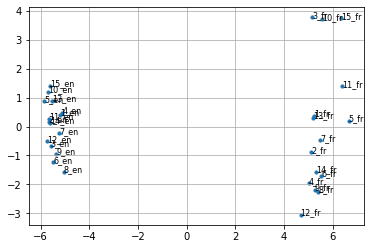

/var/folders/29/s86dlfss3gq6ybhg4frthtxr0000gp/T/ipykernel_58157/3203452147.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


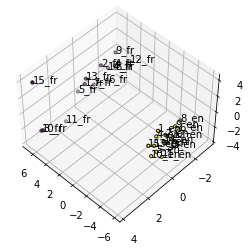

In [12]:
plt.scatter(X_trunc[:, 0], X_trunc[:, 1], s=10)
for i in range(len(y_name)):
    # plt.plot(X_trunc[i, 0], X_trunc[i, 1], 'o')
    plt.annotate(y_name[i], (X_trunc[i, 0], X_trunc[i, 1]), fontsize=8)
plt.grid(True)
plt.show()
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
y_color = [0] * 15 + [1] * 15
ax.scatter(X_trunc[:, 0], X_trunc[:, 1], X_trunc[:, 2], c=y_color,
           edgecolor='k', s=10)
for i in range(len(y_name)):
    ax.text(X_trunc[i, 0], X_trunc[i, 1], X_trunc[i, 2], y_name[i])
plt.show()

## Computation of the SVD with numpy

In [13]:
U, s, Vt = np.linalg.svd(X_scaled, full_matrices=False)
print(np.shape(U), np.shape(Vt))
print('s:', s)
print(len(s))

cumulative_inertia = np.cumsum(s)
print(list(cumulative_inertia))

(30, 30) (30, 40)
s: [3.0176e+01 9.1895e+00 7.7380e+00 5.7478e+00 4.7188e+00 4.4547e+00
 3.7848e+00 3.5233e+00 2.8713e+00 2.5936e+00 2.4191e+00 1.9188e+00
 1.7805e+00 1.6744e+00 1.5473e+00 1.4624e+00 1.3425e+00 1.1634e+00
 1.0730e+00 1.0285e+00 8.5207e-01 8.1268e-01 6.5973e-01 5.8636e-01
 4.8429e-01 3.7867e-01 3.5378e-01 3.1706e-01 2.4558e-01 1.3401e-14]
30
[30.175881722135127, 39.36534367569335, 47.10337246744757, 52.85121879386235, 57.57001777420634, 62.02474654246212, 65.8095292952526, 69.33280697988624, 72.20405700080552, 74.79764984352416, 77.21677366942102, 79.135552611468, 80.91601620634675, 82.59041488875425, 84.13766588001481, 85.60008709971073, 86.94259541678741, 88.10596669356795, 89.17900916729977, 90.20747662658354, 91.05954723708611, 91.87222739362687, 92.53195950215901, 93.11831533677514, 93.60260913162588, 93.981281100887, 94.3350594959561, 94.65212109043185, 94.89770168710054, 94.89770168710055]


### Visualizing the Inertia

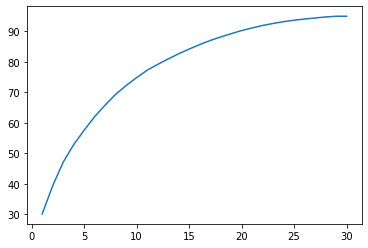

In [14]:
plt.clf()
plt.plot(range(1, len(cumulative_inertia) + 1), cumulative_inertia, '-')
plt.show()

### The new coordinates

In [15]:
Us = U @ np.diag(s)
# Axes may have opposed orientation. This is to have the same figure
I = -np.identity(len(s))
Us = Us @ I
Us

array([[ 5.2199e+00,  3.7597e-01, -6.9368e-01,  1.3015e+00, -1.9462e+00,
         8.6375e-01, -1.0850e+00,  4.2106e-01, -5.2973e-01,  7.3063e-01,
        -5.2021e-01,  3.9391e-01, -1.3296e-01, -2.8673e-01, -2.8287e-01,
         3.4571e-01,  3.3255e-01,  9.9763e-02, -3.9680e-02, -8.5862e-02,
        -3.9362e-02, -8.5278e-02, -1.6304e-01,  1.8185e-02,  1.2839e-01,
         5.4934e-02,  7.3482e-03,  4.9339e-03,  9.1165e-03,  2.4466e-15],
       [ 5.1250e+00, -8.8971e-01, -1.6817e+00, -9.6829e-01, -9.8747e-01,
         3.3085e-01,  8.0757e-02, -3.3876e-01, -2.5214e-01,  2.8552e-01,
        -4.4523e-01, -2.6785e-01, -3.3811e-01,  6.2304e-01, -2.0342e-01,
         2.3196e-01, -3.9057e-01, -2.6097e-01,  2.4647e-02, -1.5150e-01,
        -6.0495e-02,  3.4158e-02,  1.5649e-01,  1.8976e-01, -9.4315e-02,
        -5.5438e-02, -4.3921e-02,  7.6442e-02,  5.2547e-02,  2.4466e-15],
       [ 5.1555e+00,  3.7735e+00,  1.1216e+00, -2.0766e+00,  3.9316e-01,
        -1.5437e-01, -1.1693e+00,  1.5354e+00,  2

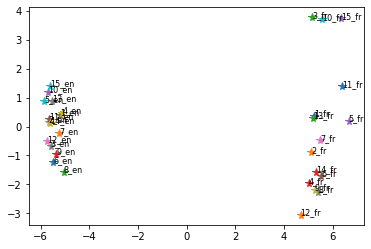

/var/folders/29/s86dlfss3gq6ybhg4frthtxr0000gp/T/ipykernel_58157/3353380472.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


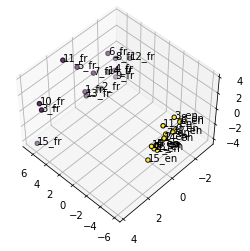

In [16]:
for i in range(len(y_name)):
    plt.plot(Us[i, 0], Us[i, 1], '*', markersize=8)
    plt.annotate(y_name[i], (Us[i, 0], Us[i, 1]), fontsize=8)
plt.show()
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
y_color = [0] * 15 + [1] * 15
ax.scatter(Us[:, 0], Us[:, 1], Us[:, 2], c=y_color,
           edgecolor='k')
for i in range(len(y_name)):
    ax.text(Us[i, 0], Us[i, 1], Us[i, 2], y_name[i])
plt.show()

## The char-document matrix: Each character is represented in a space of documents

In [17]:
yt = list(char2idx.keys())
print(yt)
X = X.T
if normalize:
    X_norm = Normalizer().fit_transform(X)
else:
    X_norm = X
X_scaled = StandardScaler().fit_transform(X_norm)
# X_std = StandardScaler().fit_transform(X)
U, s, Vt = np.linalg.svd(X_scaled, full_matrices=False)
Us = U @ np.diag(s)
print(Us)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'à', 'â', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'ù', 'û', 'œ']
[[ 2.0965e+00 -1.3196e+00 -1.6675e-01 ... -5.5374e-03  1.0251e-02
   5.1177e-03]
 [ 3.9357e+00 -6.4946e-01 -3.2843e-02 ... -2.6933e-02 -2.4995e-02
   8.0939e-03]
 [ 1.5530e+00 -1.2752e+00 -3.2551e-01 ... -5.6586e-02  2.4135e-02
   7.7821e-03]
 ...
 [-4.7473e+00  1.2131e+00  7.1742e-01 ... -1.9608e-02 -2.8347e-04
  -1.7763e-03]
 [-4.7974e+00  1.6966e+00 -5.7373e-01 ...  2.0098e-02  2.2058e-03
   7.5350e-03]
 [-5.0900e+00  4.2584e-01  3.3339e-02 ... -2.0247e-03 -1.9797e-03
  -1.7471e-03]]


### Character embeddings

In [18]:
dim = 3
E = Us[:, :dim]
print(yt)
E

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'à', 'â', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'ù', 'û', 'œ']


array([[ 2.0965e+00, -1.3196e+00, -1.6675e-01],
       [ 3.9357e+00, -6.4946e-01, -3.2843e-02],
       [ 1.5530e+00, -1.2752e+00, -3.2551e-01],
       [ 3.3868e+00, -9.6480e-01, -1.1195e-01],
       [ 2.0955e+00, -1.2608e+00, -2.3859e-01],
       [ 5.7234e+00,  8.7530e-02, -5.9279e-02],
       [ 5.5417e+00, -2.6254e-01,  7.6336e-02],
       [ 7.8897e+00,  1.7469e+00,  3.4636e-01],
       [ 2.1371e+00, -1.3054e+00, -2.3380e-01],
       [-3.0552e+00, -1.3706e+00,  5.3660e-01],
       [ 8.5292e+00,  2.6566e+00,  3.8553e-01],
       [ 9.5094e-02, -1.5566e+00, -2.3493e-01],
       [ 2.1205e+00, -1.2415e+00, -2.1590e-02],
       [ 2.3676e+00, -1.2730e+00, -2.3029e-01],
       [ 4.2520e+00, -6.3250e-01, -4.4165e-02],
       [ 5.3953e-01, -1.6208e+00, -3.3143e-01],
       [-4.3301e+00, -1.3983e+00, -1.7449e-01],
       [ 1.8839e+00, -1.3334e+00, -3.0869e-01],
       [ 7.9181e-01, -1.5467e+00, -3.7991e-01],
       [ 3.6646e+00, -7.5871e-01, -1.1045e-01],
       [-1.3887e+00, -1.5466e+00, -3.591

### Representation

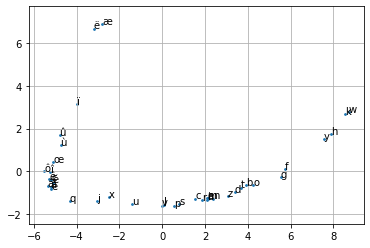

/var/folders/29/s86dlfss3gq6ybhg4frthtxr0000gp/T/ipykernel_58157/2775059628.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


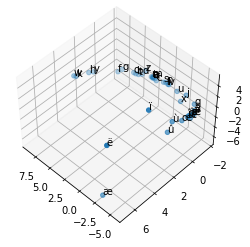

In [19]:
plt.grid(True)
plt.axis('equal')
plt.scatter(Us[:, 0], Us[:, 1], s=3)
for i in range(len(yt)):
    #plt.plot(Us[i, 0], Us[i, 1], 'bo',markersize=5)
    plt.annotate(yt[i], (Us[i, 0], Us[i, 1]))
plt.show()

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(Us[:, 0], Us[:, 1], Us[:, 2])
for i in range(len(yt)):
    ax.text(Us[i, 0], Us[i, 1], Us[i, 2], yt[i])
plt.show()